# <font color=blue>Assignments for "Data Exploration - Univariate Analysis"</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

**(1)** Interpret the data by making univariate analysis and indicate the points you consider important.

In [2]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,...,57948.00,58025.00,41167.00,NaN,NaN,731634.00,208.00,252.00,207.00,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,...,9748.00,8789.00,6714.00,NaN,NaN,122487.00,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,...,55433.00,49081.00,37410.00,NaN,NaN,673477.00,215.00,265.00,209.00,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,...,34632.00,36011.00,27651.00,NaN,NaN,441490.00,210.00,256.00,211.00,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,...,418418.00,363296.00,270675.00,NaN,NaN,5254844.00,208.00,261.00,202.00,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [4]:
(df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)

AVG_READING_8_SCORE            67.23
AVG_MATH_4_SCORE               67.06
AVG_MATH_8_SCORE               64.90
AVG_READING_4_SCORE            62.10
GRADES_1_8_G                   40.52
GRADES_9_12_G                  37.55
ENROLL                         28.63
OTHER_EXPENDITURE              28.63
SUPPORT_SERVICES_EXPENDITURE   25.66
CAPITAL_OUTLAY_EXPENDITURE     25.66
INSTRUCTION_EXPENDITURE        25.66
TOTAL_EXPENDITURE              25.66
LOCAL_REVENUE                  25.66
STATE_REVENUE                  25.66
FEDERAL_REVENUE                25.66
TOTAL_REVENUE                  25.66
GRADES_PK_G                    10.09
GRADES_KG_G                     4.84
GRADES_4_G                      4.84
GRADES_8_G                      4.84
GRADES_12_G                     4.84
GRADES_ALL_G                    4.84
STATE                           0.00
YEAR                            0.00
PRIMARY_KEY                     0.00
dtype: float64

In [5]:
for col in df.columns[3:]:
    for year in df['YEAR'].unique():
        df[col].fillna(df[df['YEAR'] == year][col].mean(), inplace=True)

In [6]:
df.isnull().any().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1715.00,2002.08,9.57,1986.00,1994.00,2002.00,2010.00,2019.00
ENROLL,1715.00,884477.87,902407.71,43866.00,464688.00,802054.33,869448.50,6307022.00
TOTAL_REVENUE,1715.00,7940013.77,10329752.73,465650.00,2992297.00,4572764.39,8165744.00,89217262.00
FEDERAL_REVENUE,1715.00,647004.28,1010028.87,31020.00,260277.00,297029.57,673280.00,9990221.00
STATE_REVENUE,1715.00,3675877.88,4874761.24,0.00,1618602.00,2088314.47,3837822.00,50904567.00
LOCAL_REVENUE,1715.00,3617131.61,4806775.87,22093.00,1162579.50,2187420.35,3484107.50,36105265.00
TOTAL_EXPENDITURE,1715.00,8038215.02,10529051.03,481665.00,3004448.50,4653591.04,8220253.00,85320133.00
INSTRUCTION_EXPENDITURE,1715.00,4174328.62,5525256.35,265549.00,1570157.00,2454000.47,4133617.50,43964520.00
SUPPORT_SERVICES_EXPENDITURE,1715.00,2345867.85,2950640.58,139963.00,899691.00,1370148.98,2442635.00,26058021.00
OTHER_EXPENDITURE,1715.00,377926.08,459153.58,11541.00,162478.00,248234.78,407999.50,3995951.00


In [8]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

for col in cat_cols:
    print(df[col].value_counts(),'\n\n','='*100)

1992_ALABAMA        1
2014_NEW_JERSEY     1
2014_NEVADA         1
2014_NEBRASKA       1
2014_MONTANA        1
                   ..
2003_DELAWARE       1
2003_CONNECTICUT    1
2003_COLORADO       1
2003_CALIFORNIA     1
2019_WYOMING        1
Name: PRIMARY_KEY, Length: 1715, dtype: int64 

ALABAMA                 33
ALASKA                  33
NEVADA                  33
NEW_HAMPSHIRE           33
NEW_JERSEY              33
NEW_MEXICO              33
NEW_YORK                33
NORTH_CAROLINA          33
NORTH_DAKOTA            33
OHIO                    33
OKLAHOMA                33
OREGON                  33
PENNSYLVANIA            33
RHODE_ISLAND            33
SOUTH_CAROLINA          33
SOUTH_DAKOTA            33
TENNESSEE               33
TEXAS                   33
UTAH                    33
VERMONT                 33
VIRGINIA                33
WASHINGTON              33
WEST_VIRGINIA           33
WISCONSIN               33
WYOMING                 33
NEBRASKA                33
MONTANA 

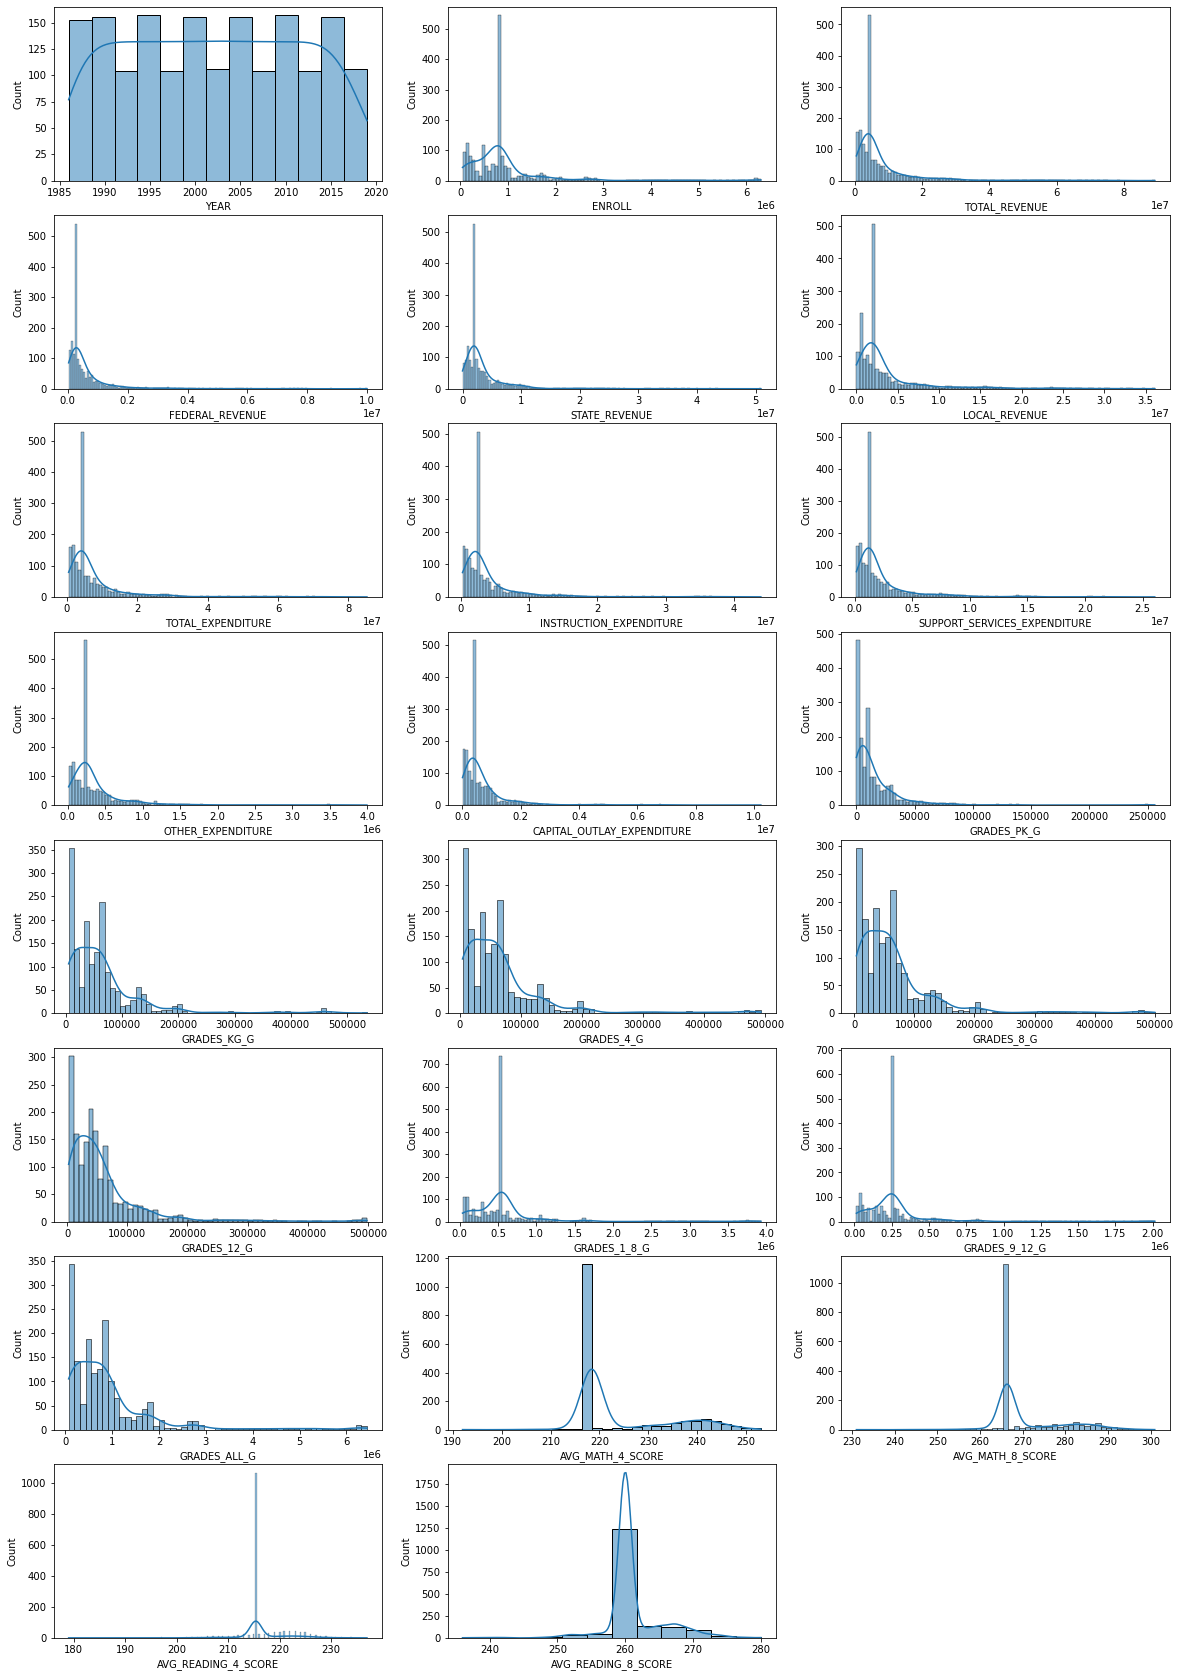

In [9]:
nums = [col for col in df.columns if df[col].dtypes != "O"]

plt.figure(figsize=(20, 30))
for i, col in enumerate(nums):
    plt.subplot(8, 3, i+1)
    ax = sns.histplot(data=df, x=col, kde=True)


The vast majority of data is right-skewed data.

**(2)** Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

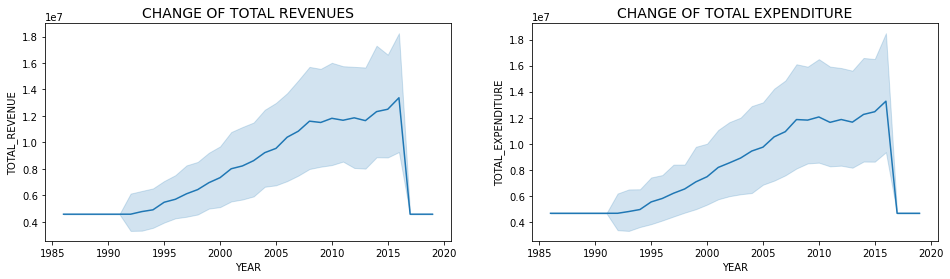

In [10]:
colorado = df[df['STATE'] == 'COLORADO'].sort_values(by='YEAR')

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='YEAR', y='TOTAL_REVENUE')
plt.title('CHANGE OF TOTAL REVENUES', fontsize=14)
plt.subplot(1, 2, 2)
sns.lineplot(data=df, x='YEAR', y='TOTAL_EXPENDITURE')
plt.title('CHANGE OF TOTAL EXPENDITURE', fontsize=14);


Two variables change by years.

**(3)** In which course are students more successful in your chosen state? Mathematics or reading?

In [11]:
colorado[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
          'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].mean()

AVG_MATH_4_SCORE      224.78
AVG_MATH_8_SCORE      271.94
AVG_READING_4_SCORE   218.02
AVG_READING_8_SCORE   262.30
dtype: float64

Mathematics averages are higher in 4 and 8 scores.

**(4)** What is the distribution of mathematics and reading grades?

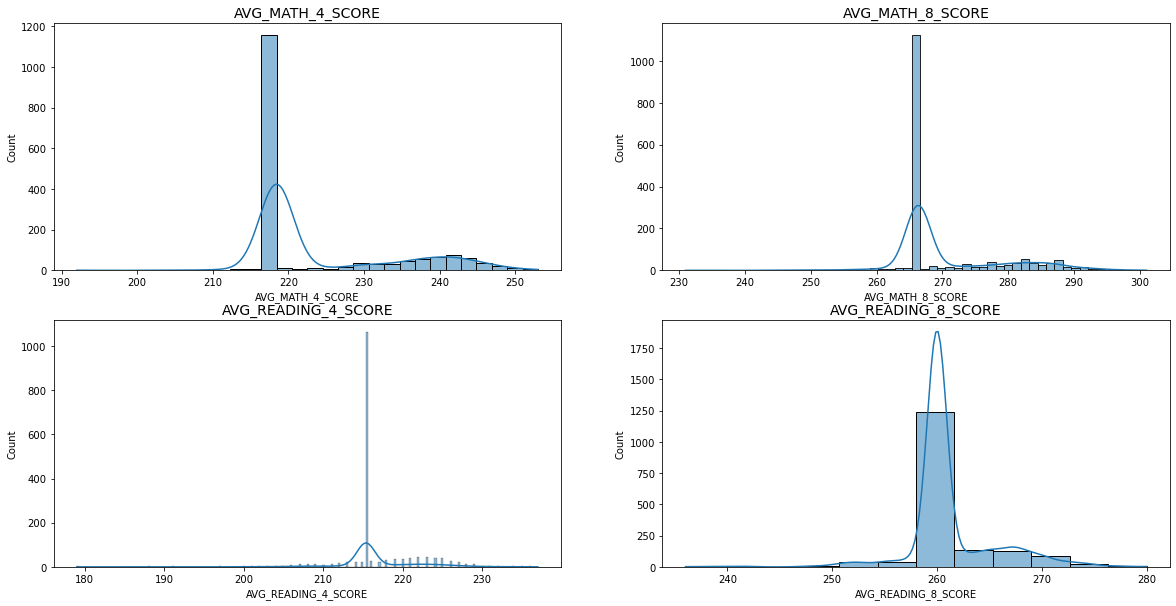

In [12]:
cols = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

plt.figure(figsize=(20, 10))
for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    ax = sns.histplot(data=df, x=col, kde=True)
    plt.title(col, fontsize=14)


**(5)** You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

In [13]:
df = pd.read_csv('states_all.csv')

(df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)

AVG_READING_8_SCORE            67.23
AVG_MATH_4_SCORE               67.06
AVG_MATH_8_SCORE               64.90
AVG_READING_4_SCORE            62.10
GRADES_1_8_G                   40.52
GRADES_9_12_G                  37.55
ENROLL                         28.63
OTHER_EXPENDITURE              28.63
SUPPORT_SERVICES_EXPENDITURE   25.66
CAPITAL_OUTLAY_EXPENDITURE     25.66
INSTRUCTION_EXPENDITURE        25.66
TOTAL_EXPENDITURE              25.66
LOCAL_REVENUE                  25.66
STATE_REVENUE                  25.66
FEDERAL_REVENUE                25.66
TOTAL_REVENUE                  25.66
GRADES_PK_G                    10.09
GRADES_KG_G                     4.84
GRADES_4_G                      4.84
GRADES_8_G                      4.84
GRADES_12_G                     4.84
GRADES_ALL_G                    4.84
STATE                           0.00
YEAR                            0.00
PRIMARY_KEY                     0.00
dtype: float64

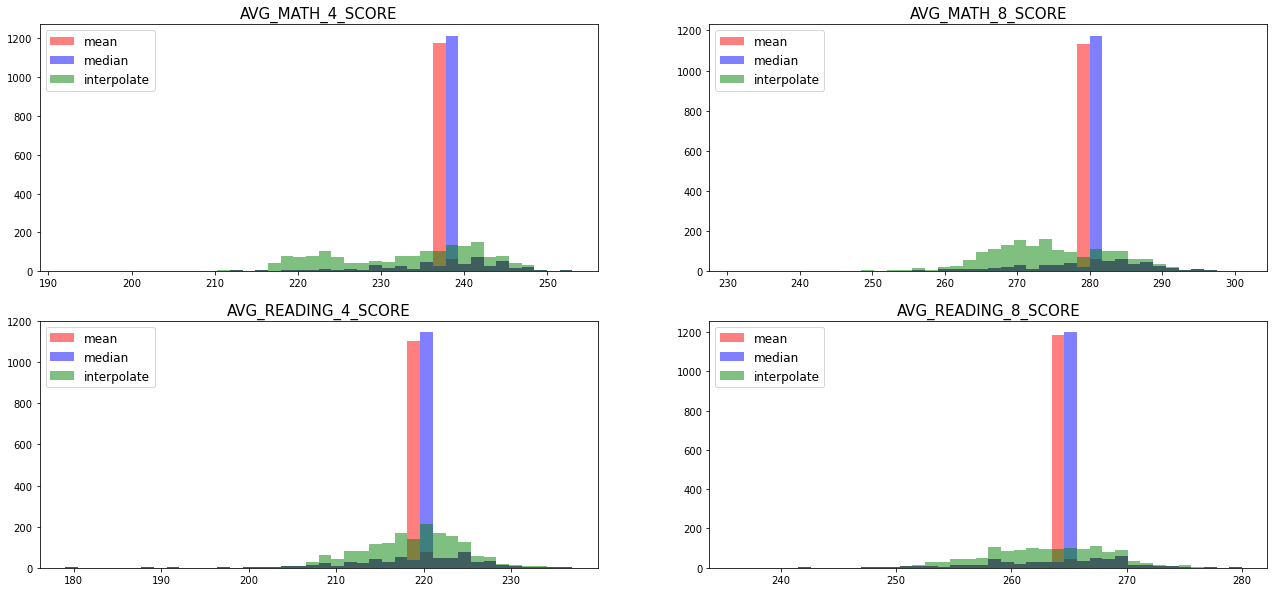

In [14]:
plt.figure(figsize=(22, 10))
for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    plt.hist(df[col].fillna(df[col].mean()), bins=40, color='red', alpha=0.5, label='mean')
    plt.hist(df[col].fillna(df[col].median()), bins=40, color='blue', alpha=0.5, label='median') 
    plt.hist(df[col].interpolate(), bins=40, color='green', alpha=0.5, label='interpolate') 
    plt.title(col, fontsize=15)
    plt.legend(loc='upper left', fontsize=12)
